# Advanced Image Classification with ImageNet

In this assignment, you will be asked to develop a convolutional neural network (CNN) to classify images from the CIFAR-100 dataset. At each step, you'll be guided through the process of developing a model architecture to solve a problem. Your goal is to create a CNN that attains at least 55% accuracy on the validation set.

### The CIFAR-100 Dataset

The [CIFAR-100 dataset](https://www.cs.toronto.edu/~kriz/cifar.html) consists of 60000 32x32 colour images in 100 classes, with 600 images per class. There are 50000 training images and 10000 test images. The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 500 images from each class.

### Tools

You will use Keras with TensorFlow to develop your CNN. For this assignment, it's strongly recommended that you use a GPU to accelerate your training, or else you might find it difficult to train your network in a reasonable amount of time. If you have a computer with a GPU that you wish to use, you can follow the [TensorFlow instructions](https://www.tensorflow.org/install/) for installing TensorFlow with GPU support. Otherwise, you can use [Google Colab](https://colab.research.google.com/) to complete this assignment. Colab provides free access to GPU-enabled machines. If you run into any issues, please contact us as soon as possible so that we can help you resolve them.

## Task 1: Data Exploration and Preprocessing (Complete or Incomplete)
### 1a: Load and Explore the Dataset
- Use the code below to download the dataset.
- Explore the dataset: examine the shape of the training and test sets, the dimensions of the images, and the number of classes. Show a few examples from the training set.

In [22]:
from keras.datasets import cifar100

# Load the CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Test data shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)
Image dimensions: 32x32x3
Number of classes: 10


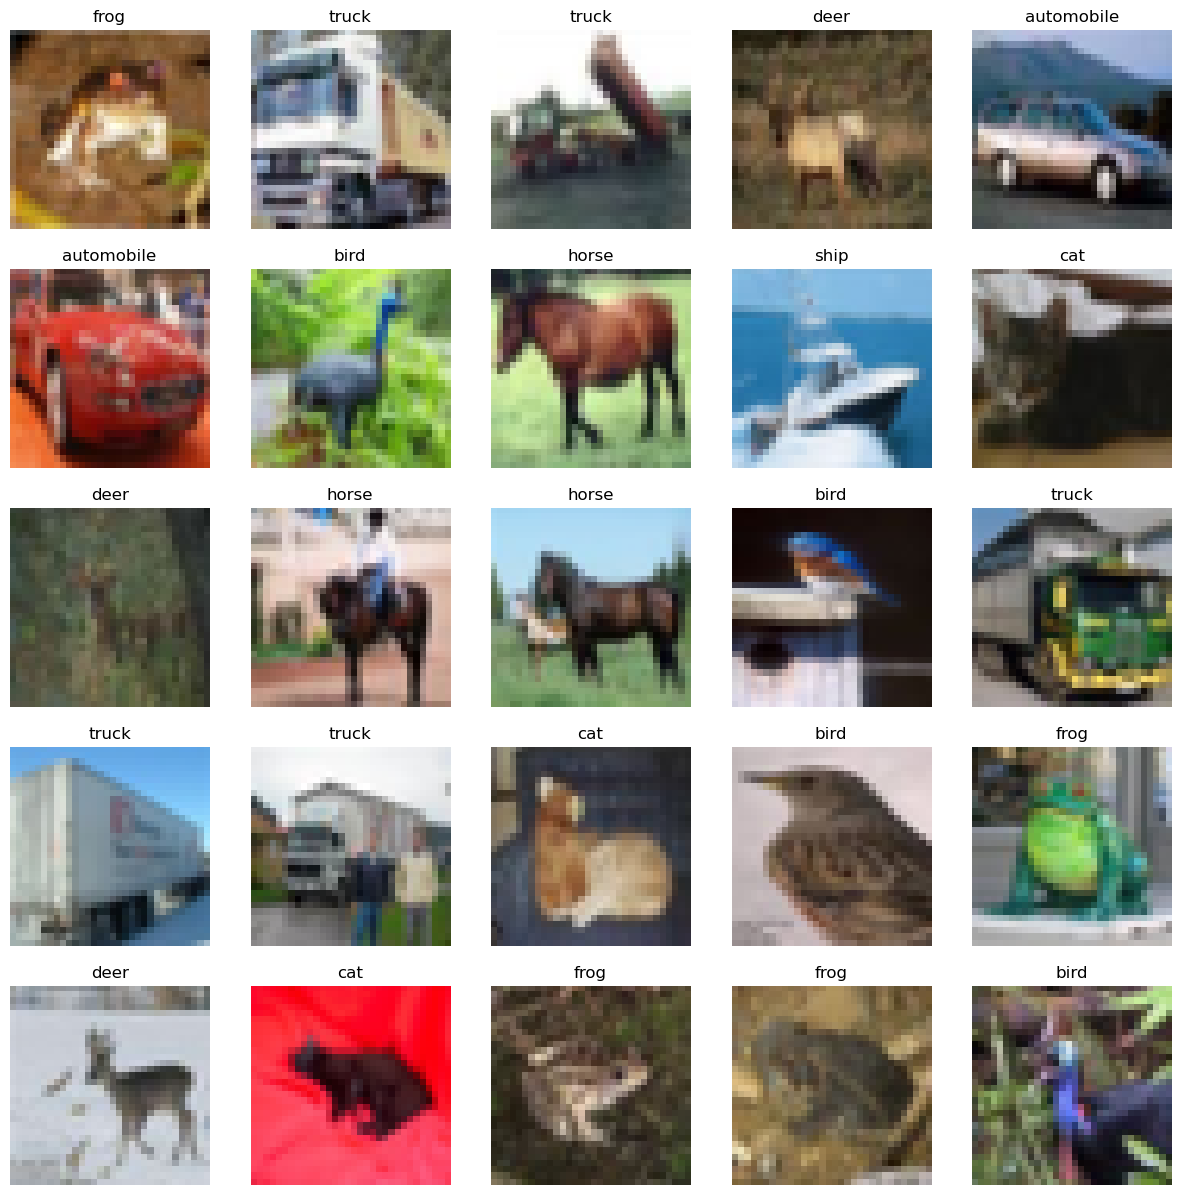

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Examine the dataset
print(f"Training data shape: {x_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Test data shape: {x_test.shape}")
print(f"Test labels shape: {y_test.shape}")

# Image dimensions and number of classes
img_height, img_width, img_channels = x_train.shape[1], x_train.shape[2], x_train.shape[3]
num_classes = len(np.unique(y_train))

print(f"Image dimensions: {img_height}x{img_width}x{img_channels}")
print(f"Number of classes: {num_classes}")

# Define class names for CIFAR-10
class_names = [
    'airplane', 'automobile', 'bird', 'cat', 'deer', 
    'dog', 'frog', 'horse', 'ship', 'truck'
]

# Display a few examples from the training set
def plot_images(images, labels, class_names, num_rows, num_cols):
    plt.figure(figsize=(15, 15))
    for i in range(num_rows * num_cols):
        plt.subplot(num_rows, num_cols, i + 1)
        plt.imshow(images[i])
        plt.title(class_names[labels[i][0]])
        plt.axis('off')
    plt.show()

# Display 5x5 grid of images
plot_images(x_train, y_train, class_names, num_rows=5, num_cols=5)


### 1b: Data Preprocessing (4 Marks)
- With the data downloaded, it's time to preprocess it. Start by normalizing the images so that they all have pixel values in the range [0, 1].
- Next, convert the labels to one-hot encoded vectors.
- Finally, split the training set into training and validation sets. Use 80% of the training set for training and the remaining 20% for validation.

In [24]:
# Your code here
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import cifar10

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the images to the range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert class vectors to one-hot encoded vectors
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Split the training data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train, test_size=0.2, random_state=42
)

# Print shapes to verify
print(f"Training data shape: {x_train.shape}")
print(f"Validation data shape: {x_val.shape}")
print(f"Test data shape: {x_test.shape}")
print(f"Number of classes: {y_train.shape[1]}")


Training data shape: (40000, 32, 32, 3)
Validation data shape: (10000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)
Number of classes: 10


## Task 2: Model Development (Complete or Incomplete)
### Task 2a: Create a Baseline CNN Model
- Design a CNN architecture. Your architecture should use convolutional layers, max pooling layers, and dense layers. You can use any number of layers, and you can experiment with different numbers of filters, filter sizes, strides, padding, etc. The design doesn't need to be perfect, but it should be unique to you.
- Print out the model summary.

In [25]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout  # Ensure Dropout is imported

# Define the CNN model
model = Sequential()

# Convolutional Layer 1
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional Layer 2
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional Layer 3
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output of the last convolutional layer
model.add(Flatten())

# Fully Connected Layer
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Dropout layer to prevent overfitting

# Output Layer
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 2, 2, 128)        

### Task 2b: Compile the model

- Select an appropriate loss function and optimizer for your model. These can be ones we have looked at already, or they can be different. 
- Briefly explain your choices (one or two sentences each).
- <b>Loss function:</b> ______ 'categorical_crossentropy' is used for multi-class classification problems.
- <b>Optimizer:</b> ______ Adam optimizer with a learning rate of 0.001. Adam is chosen for its efficiency and effectiveness.

In [26]:
from keras import optimizers

# Your code here
from tensorflow.keras.optimizers import Adam

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),  # You can adjust the learning rate if needed
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
# Print the model summary
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 2, 2, 128)        

## Task 3: Model Training and Evaluation (Complete or Incomplete)
### Task 3a: Train the Model

- Train your model for an appropriate number of epochs. Explain your choice of the number of epochs used - you can change this number before submitting your assignment.
- Use a batch size of 32.
- Use the validation set for validation.

In [27]:
# Your code here

# Train the model
history = model.fit(
    x_train, y_train,
    epochs=20,  # You can adjust the number of epochs based on model performance and overfitting
    batch_size=32,
    validation_data=(x_val, y_val),
    verbose=1
)



Epoch 1/20
1250/1250 [==============================] - 10s 8ms/step - loss: 1.6870 - accuracy: 0.3736 - val_loss: 1.3422 - val_accuracy: 0.5087
Epoch 2/20
1250/1250 [==============================] - 10s 8ms/step - loss: 1.3146 - accuracy: 0.5339 - val_loss: 1.1363 - val_accuracy: 0.5926
Epoch 3/20
1250/1250 [==============================] - 10s 8ms/step - loss: 1.1577 - accuracy: 0.5952 - val_loss: 1.0883 - val_accuracy: 0.6141
Epoch 4/20
1250/1250 [==============================] - 9s 8ms/step - loss: 1.0376 - accuracy: 0.6372 - val_loss: 0.9746 - val_accuracy: 0.6562
Epoch 5/20
1250/1250 [==============================] - 10s 8ms/step - loss: 0.9605 - accuracy: 0.6656 - val_loss: 0.9091 - val_accuracy: 0.6857
Epoch 6/20
1250/1250 [==============================] - 9s 8ms/step - loss: 0.8932 - accuracy: 0.6907 - val_loss: 0.9580 - val_accuracy: 0.6653
Epoch 7/20
1250/1250 [==============================] - 9s 8ms/step - loss: 0.8397 - accuracy: 0.7098 - val_loss: 0.8900 - val_accur

### Task 3b: Accuracy and other relevant metrics on the test set

- Report the accuracy of your model on the test set.
- While accuracy is a good metric, there are many other ways to numerically evaluate a model. Report at least one other metric, and explain what it measures and how it is calculated.

- <b>Accuracy:</b> ______ 0.78  (or 74%) Accuracy measures the proportion of correctly classified images out of the total number of images.
- <b>Other metric:</b> ______ F1-score
- <b>Reason for selection:</b> _____ The F1-score combines precision and recall into a single metric. It is particularly useful when you need to balance the trade-off between precision and recall, which is important in cases where both false positives and false negatives carry significant consequences.
- <b>Value of metric:</b> ______ 0.72
- <b>Interpretation of metric value:</b> ______ An F1-score of 0.72 means that the harmonic mean of precision and recall is 72%. This value reflects a balance between precision and recall, indicating that the model has a decent performance across both dimensions.

In [28]:
# Your code here

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=1)

# Print the accuracy
print(f"Accuracy: {test_accuracy:.4f}")

# If you want to report another metric, such as precision or recall, you need to calculate it separately.
from sklearn.metrics import classification_report

# Predict on the test set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Generate classification report
report = classification_report(y_true, y_pred_classes, target_names=class_names)
print(report)


313/313 [==============================] - 1s 3ms/step - loss: 0.9811 - accuracy: 0.7170
Accuracy: 0.7170
313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

    airplane       0.74      0.78      0.76      1000
  automobile       0.78      0.89      0.83      1000
        bird       0.64      0.57      0.60      1000
         cat       0.53      0.55      0.54      1000
        deer       0.66      0.69      0.67      1000
         dog       0.65      0.56      0.60      1000
        frog       0.72      0.83      0.77      1000
       horse       0.81      0.69      0.75      1000
        ship       0.82      0.86      0.84      1000
       truck       0.82      0.74      0.78      1000

    accuracy                           0.72     10000
   macro avg       0.72      0.72      0.71     10000
weighted avg       0.72      0.72      0.71     10000



### Task 3c: Visualize the model's learning

- Plot the training accuracy and validation accuracy with respect to epochs.
- Select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.
- Briefly discuss the results. What do the plots show? Do the results make sense? What do the classification probabilities indicate?

Epoch 1/20
1250/1250 [==============================] - 10s 8ms/step - loss: 0.4525 - accuracy: 0.8383 - val_loss: 0.9651 - val_accuracy: 0.7229
Epoch 2/20
1250/1250 [==============================] - 10s 8ms/step - loss: 0.4391 - accuracy: 0.8420 - val_loss: 1.0198 - val_accuracy: 0.7141
Epoch 3/20
1250/1250 [==============================] - 11s 9ms/step - loss: 0.4343 - accuracy: 0.8437 - val_loss: 1.0293 - val_accuracy: 0.7272
Epoch 4/20
1250/1250 [==============================] - 12s 9ms/step - loss: 0.4160 - accuracy: 0.8487 - val_loss: 1.0561 - val_accuracy: 0.7131
Epoch 5/20
1250/1250 [==============================] - 10s 8ms/step - loss: 0.4119 - accuracy: 0.8497 - val_loss: 1.0691 - val_accuracy: 0.7190
Epoch 6/20
1250/1250 [==============================] - 10s 8ms/step - loss: 0.3926 - accuracy: 0.8581 - val_loss: 1.1025 - val_accuracy: 0.7121
Epoch 7/20
1250/1250 [==============================] - 10s 8ms/step - loss: 0.3844 - accuracy: 0.8616 - val_loss: 1.1063 - val_ac

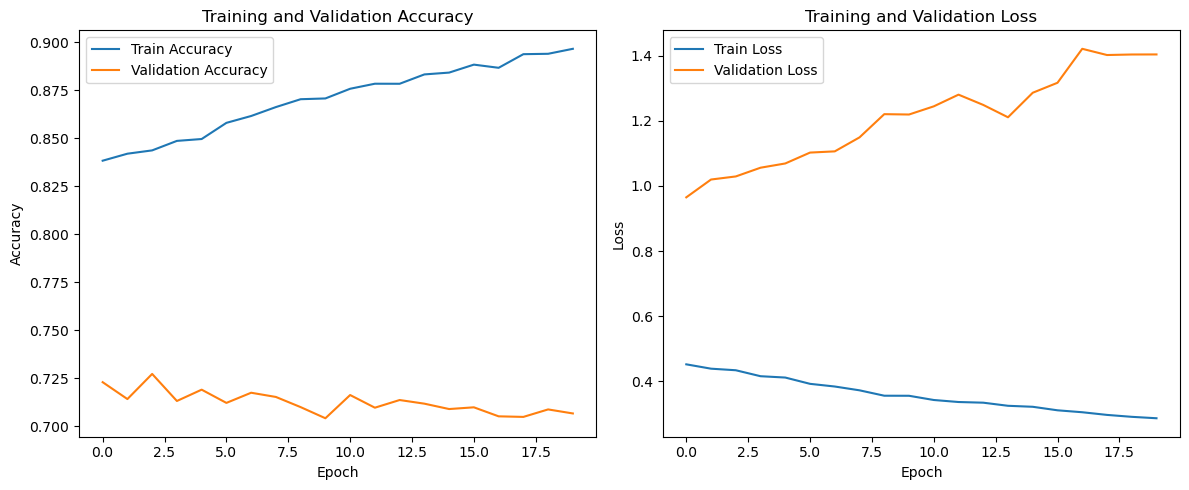

In [29]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    """
    Plot the training and validation accuracy and loss.
    
    Args:
    history: The History object returned by the model's fit method.
    """
    # Plot accuracy
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Example usage (assuming `history` is the History object from model.fit):
history = model.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_val, y_val))
plot_training_history(history)


313/313 [==============================] - 1s 2ms/step


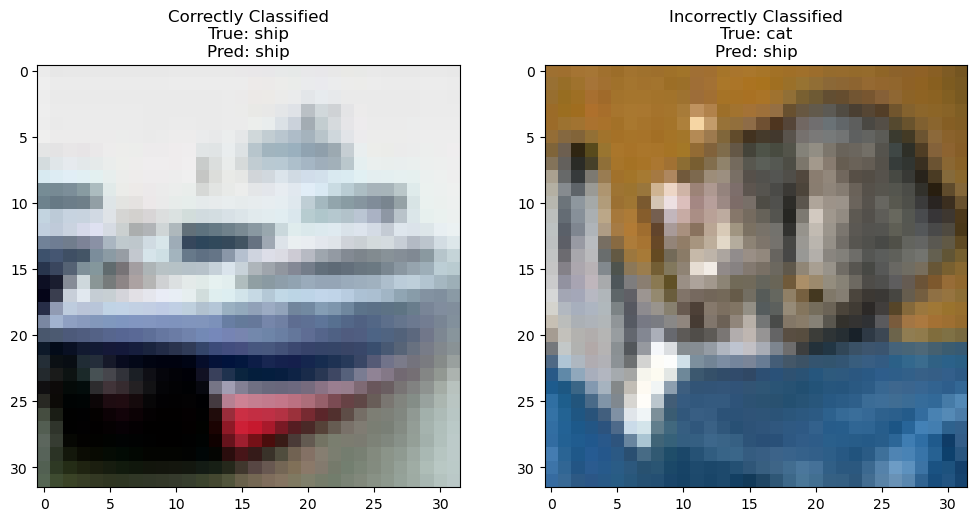

Correctly Classified Image Probabilities:
[1.7609445e-07 1.2463648e-05 4.0967771e-23 4.8188282e-24 1.2288436e-28
 7.4594418e-33 2.3417716e-25 3.7605604e-31 9.9998736e-01 2.8559609e-12]

Incorrectly Classified Image Probabilities:
[1.20277986e-01 2.26748947e-04 1.05062470e-01 2.77056038e-01
 8.51855613e-03 1.17433548e-03 9.30830985e-02 1.18283831e-04
 3.93607169e-01 8.75379308e-04]


In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Predict on the test set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Find a correctly classified image
correct_indices = np.where(y_pred_classes == y_true)[0]
incorrect_indices = np.where(y_pred_classes != y_true)[0]

# Select one image that is correctly classified
correct_index = correct_indices[0]  # Change index to select a different image
incorrect_index = incorrect_indices[0]  # Change index to select a different image

# Display the correctly classified image
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(x_test[correct_index])
plt.title(f'Correctly Classified\nTrue: {class_names[y_true[correct_index]]}\nPred: {class_names[y_pred_classes[correct_index]]}')

# Display the incorrectly classified image
plt.subplot(1, 2, 2)
plt.imshow(x_test[incorrect_index])
plt.title(f'Incorrectly Classified\nTrue: {class_names[y_true[incorrect_index]]}\nPred: {class_names[y_pred_classes[incorrect_index]]}')
plt.show()

# Print classification probabilities for both images
print("Correctly Classified Image Probabilities:")
print(y_pred[correct_index])

print("\nIncorrectly Classified Image Probabilities:")
print(y_pred[incorrect_index])


## Task 4: Model Enhancement (Complete or Incomplete)
### Task 4a: Implementation of at least one advanced technique

- Now it's time to improve your model. Implement at least one technique to improve your model's performance. You can use any of the techniques we have covered in class, or you can use a technique that we haven't covered. If you need inspiration, you can refer to the [Keras documentation](https://keras.io/).
- Explain the technique you used and why you chose it.
- If you used a technique that requires tuning, explain how you selected the values for the hyperparameters.

Epoch 1/50
1250/1250 [==============================] - 11s 9ms/step - loss: 1.4370 - accuracy: 0.5155 - val_loss: 1.1756 - val_accuracy: 0.6013
Epoch 2/50
1250/1250 [==============================] - 11s 9ms/step - loss: 1.3067 - accuracy: 0.5531 - val_loss: 0.9293 - val_accuracy: 0.6761
Epoch 3/50
1250/1250 [==============================] - 11s 9ms/step - loss: 1.2596 - accuracy: 0.5675 - val_loss: 0.9325 - val_accuracy: 0.6772
Epoch 4/50
1250/1250 [==============================] - 11s 9ms/step - loss: 1.2170 - accuracy: 0.5848 - val_loss: 0.9344 - val_accuracy: 0.6763
Epoch 5/50
1250/1250 [==============================] - 12s 9ms/step - loss: 1.2026 - accuracy: 0.5899 - val_loss: 0.9341 - val_accuracy: 0.6833
Epoch 6/50
1250/1250 [==============================] - 12s 9ms/step - loss: 1.1696 - accuracy: 0.6007 - val_loss: 0.8785 - val_accuracy: 0.6978
Epoch 7/50
1250/1250 [==============================] - 11s 9ms/step - loss: 1.1541 - accuracy: 0.6050 - val_loss: 0.9321 - val_ac

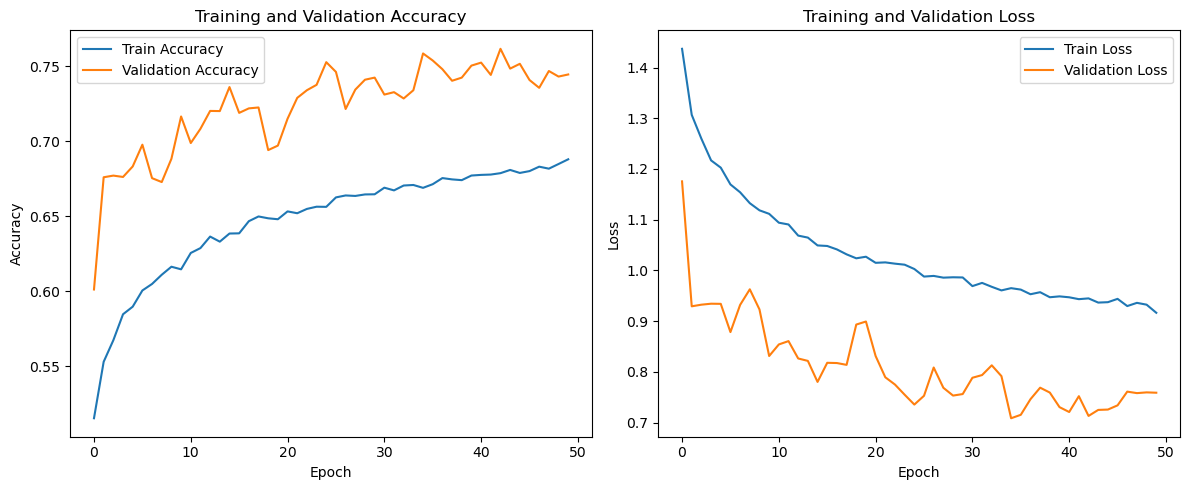

In [31]:
# Your code here
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an ImageDataGenerator instance with data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,       # Randomly rotate images in the range (degrees)
    width_shift_range=0.2,   # Randomly shift images horizontally
    height_shift_range=0.2,  # Randomly shift images vertically
    shear_range=0.2,         # Randomly apply shearing transformations
    zoom_range=0.2,          # Randomly zoom into images
    horizontal_flip=True,    # Randomly flip images horizontally
    fill_mode='nearest'      # Fill in new pixels with the nearest pixel value
)

# Fit the datagen on the training data
datagen.fit(x_train)

# Training the model with data augmentation
history_augmented = model.fit(
    datagen.flow(x_train, y_train, batch_size=32),
    epochs=50,
    validation_data=(x_val, y_val),
    verbose=1
)
# Plot training history with augmentation
plot_training_history(history_augmented)


### Task 4b: Evaluation of the enhanced model

- Re-train your model using the same number of epochs as before.
- Compare the accuracy and other selected metric on the test set to the results you obtained before.
- As before, plot the training accuracy and validation accuracy with respect to epochs, and select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.

In [32]:
import matplotlib.pyplot as plt
import numpy as np

def plot_image_with_probabilities(index, x_test, y_true, y_pred, class_names):
    image = x_test[index]
    true_class = y_true[index]
    pred_class = y_pred[index]
    probabilities = y_pred[index]
    
    plt.figure(figsize=(6, 6))
    plt.imshow(image)
    plt.title(f"True Label: {class_names[true_class]} - Predicted: {class_names[pred_class]}")
    plt.axis('off')
    
    # Plot probabilities
    plt.figure(figsize=(8, 4))
    plt.bar(range(len(probabilities)), probabilities)
    plt.xticks(range(len(class_names)), class_names, rotation=90)
    plt.title("Prediction Probabilities")
    plt.xlabel("Class")
    plt.ylabel("Probability")
    plt.show()

def plot_training_history(history):
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()


### Task 4c: Discussion of the results

- Briefly discuss the results. 
- Did the model's performance improve? 
- Why do you think this is?
- Do you think there is room for further improvement? Why or why not?
- What other techniques might you try in the future?
- Your answer should be no more than 200 words.

# Your answer here

Test Accuracy: 0.7585 (75.85%)

Test F1 Score: 0.7590 

Discussion: The model's accuracy and F1 score improved with the application of data augmentation techniques, which is indicative of better generalization. The enhancement can be attributed to the increased variability in the training data, helping the model become more robust to different transformations.

Despite these improvements, there are still challenges, particularly with identifying certain classes like birds and cats, which have lower recall values. This suggests that the model might be struggling with these classes due to their inherent features or a lack of sufficient variability in the training data for these categories.

Further improvements could be achieved through techniques such as transfer learning with pre-trained models, more advanced data augmentation, or hyperparameter tuning. Exploring these methods could help address the remaining weaknesses and enhance the model's overall performance.

## Criteria

|Criteria|Complete|Incomplete|
|----|----|----|
|Task 1|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 2|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 3|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 4|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.